<a href="https://colab.research.google.com/github/omelkoj/Python_Data_Analysis_Music__And_Academics/blob/main/Music_and_Grades_Analysis_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As a piano teacher, I find the correlation between academic performance and musical participation to be very interesting. 

I gathered the data and created a csv from an online study at this link: https://psycnet.apa.org/fulltext/2019-34936-001.html. 

I will be approaching my analysis of this data as if I were presenting it to a school board in hopes of convincing them to continue finding music programs for students, and I will walk you through my thought processes accordingly.

First, I will import libraries and styling for the graphs.

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import matplotlib as mpl
import numpy as np
import seaborn as sns
from matplotlib import cm

Here, I will first import the csv file that I have created. 

Then, I will replace some values and fill in null values to be able to work with the data more easily, and make a new dataframe that I will use for the rest of the project.

In [135]:
#IMPORT CSV
df = pd.read_csv("https://raw.githubusercontent.com/omelkoj/Python_Data_Analysis_Music__And_Academics/main/Revised%20Analysis%20Of%20School%20Musical%20Participation%20and%20Academic%20Exam%20Scores%20in%20Public%20Secondary%20School%20Students%20-%20Sheet1.csv")
print(df.values)

#change values for better clarity of engagement values
df['engagement_levels'] = df['engagement_levels'].replace([0,1,2,3],[1,2,3,4])

#make new dataframe with null values filled in with 0
df_musical_analysis = df.fillna('0')
print(df_musical_analysis)

#Choose color palette for cohesive styling: #194a94, #477ed1, #85aded


[['English 12' 69.71 '63,131' 'no' nan nan nan]
 ['English 10' 70.87 '96,216' 'no' nan nan nan]
 ['Math 10' 67.03 '75,616' 'no' nan nan nan]
 ['Science 10' 67.23 '95,873' 'no' nan nan nan]
 ['English 12' 72.18 '11,419' 'yes' nan nan nan]
 ['English 10' 73.59 '15,391' 'yes' nan nan nan]
 ['Math 10' 70.75 '13,772' 'yes' nan nan nan]
 ['Science 10' 70.99 '15,416' 'yes' nan nan nan]
 ['English 12' 74.9 '2,728' 'vocal' nan nan nan]
 ['English 10' 77.08 '3,766' 'vocal' nan nan nan]
 ['Math 10' 72.04 '3,198' 'vocal' nan nan nan]
 ['Science 10' 73.03 '3,769' 'vocal' nan nan nan]
 ['English 12' 76.33 '5,749' 'instrumental' nan nan nan]
 ['English 10' 78.64 '7,652' 'instrumental' nan nan nan]
 ['Math 10' 77.0 '6,994' 'instrumental' nan nan nan]
 ['Science 10' 76.82 '7,665' 'instrumental' nan nan nan]
 ['English 12' nan nan 'vocal_engagement' 0.0 69.59 '63,131']
 ['English 10' nan nan 'vocal_engagement' 0.0 70.67 '96,216']
 ['Math 10' nan nan 'vocal_engagement' 0.0 66.79 '75,616']
 ['Science 10' 

I will also change some columns to the int datatype, so that I can do math with them.

In [136]:
#Change necessary columns to int datatype
df_musical_analysis = df_musical_analysis.astype({'engagement_levels': int})
df_musical_analysis = df_musical_analysis.astype({'engagement_exam_number': int})
df_musical_analysis = df_musical_analysis.astype({'student_exam_grades': int})
df_musical_analysis.dtypes

school_subjects              object
student_exam_grades           int64
student_number               object
musical_participation        object
engagement_levels             int64
engagement_exam_number        int64
engagement_student_number    object
dtype: object

Since the study didn't have much extra data, I didn't have to clean my data very much. However, I will continue cleaning and reorganizing the data wherever necessary as I work on plotting the graphs.

I will begin with some statistical analysis to get to know the data a bit better.

In [137]:
#Find average of grades per participation category
#AVERAGE OF STUDENT EXAM GRADES THAT HAVE NO MUSICAL PARTICIPATION
df_musical_analysis_no_musical_participation = df_musical_analysis[(df_musical_analysis['musical_participation'] == 'no')]
df_musical_analysis_grades_no_participation = (df_musical_analysis_no_musical_participation['student_exam_grades']).mean()
print(df_musical_analysis_grades_no_participation)

#AVERAGE OF STUDENT EXAM GRADES THAT HAVE VOCAL MUSICAL PARTICIPATION
df_musical_analysis_vocal_musical_participation = df_musical_analysis[(df_musical_analysis['musical_participation'] == 'vocal')]
df_musical_analysis_grades_vocal_participation = (df_musical_analysis_vocal_musical_participation['student_exam_grades']).mean()
print(df_musical_analysis_grades_vocal_participation)

#AVERAGE OF STUDENT EXAM GRADES THAT HAVE INSTRUMENTAL MUSICAL PARTICIPATION
df_musical_analysis_instrumental_musical_participation = df_musical_analysis[(df_musical_analysis['musical_participation'] == 'instrumental')]
df_musical_analysis_grades_instrumental_participation = (df_musical_analysis_instrumental_musical_participation['student_exam_grades']).mean()
print(df_musical_analysis_grades_instrumental_participation)

#AVERAGE OF STUDENT EXAM GRADES THAT HAVE ANY MUSICAL PARTICIPATION - make a function here?
df_musical_analysis_any_musical_participation = ((df_musical_analysis_grades_vocal_participation + df_musical_analysis_grades_instrumental_participation) / 2)
print(df_musical_analysis_any_musical_participation) 

68.25
74.0
76.75
75.375


In [139]:
print(df.info())

#finding levels/unique values of categorical values
school_Series = df['school_subjects']
school_subjects = school_Series.unique()
print(school_subjects)

number_Series = df['student_number']
student_number = number_Series.unique()
print(student_number)

participation_Series = df['musical_participation']
school_participation = participation_Series.unique()
print(school_participation)

engagement_Series = df['engagement_student_number']
student_engagement = engagement_Series.unique()
print(student_engagement)

#get values
print(df.values)

#get columns
print(df.columns)

#get index
print(df.index)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   school_subjects            48 non-null     object 
 1   student_exam_grades        16 non-null     float64
 2   student_number             16 non-null     object 
 3   musical_participation      48 non-null     object 
 4   engagement_levels          32 non-null     float64
 5   engagement_exam_number     32 non-null     float64
 6   engagement_student_number  32 non-null     object 
dtypes: float64(3), object(4)
memory usage: 2.8+ KB
None
['English 12' 'English 10' 'Math 10' 'Science 10']
['63,131' '96,216' '75,616' '95,873' '11,419' '15,391' '13,772' '15,416'
 '2,728' '3,766' '3,198' '3,769' '5,749' '7,652' '6,994' '7,665' nan]
['no' 'yes' 'vocal' 'instrumental' 'vocal_engagement'
 'instrumental_enagagement']
[nan '63,131' '96,216' '75,616' '95,873' '1,796' '2,669' '2,

Here, I continue to explore the data in a broad sense by creating a histogram for two sets of data - the student grades based on participation, and based on engagement.

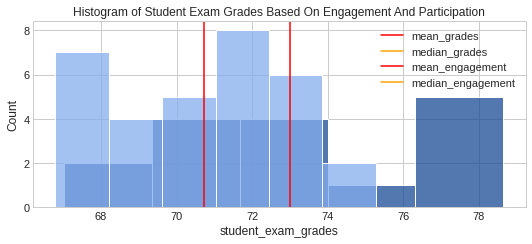

In [140]:
#continuous variable histograms for two categories of student grades I will be using the most.

ax = sns.histplot(df['student_exam_grades'], kde=False, color='#194a94')
plt.axvline(x=np.mean(df['student_exam_grades']), color='red', label='mean_grades')
plt.axvline(x=np.median(df['student_exam_grades']), color='orange', label='median_grades')
plt.legend(loc='upper right')

ax = sns.histplot(df['engagement_exam_number'], kde=False, color='#85aded')
plt.axvline(x=np.mean(df['engagement_exam_number']), color='red', label='mean_engagement')
plt.axvline(x=np.median(df['engagement_exam_number']), color='orange', label='median_engagement')
plt.title("Histogram of Student Exam Grades Based On Engagement And Participation")
plt.legend(loc='upper right')

This first bar graph is meant to broadly demonstrate the clear effect that musical participation has on academic performance.

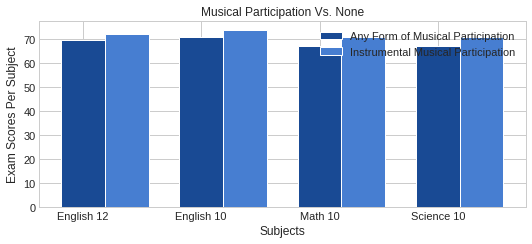

In [141]:
#CREATE NEW DATAFRAMES IN ORDER TO SET CONDITIONALS
df_no = df[df['musical_participation'] == "no"]
df_participation = df[df['musical_participation'] == "yes"]


#using the new dataframes to filter the values I need in the appropriate columns
x = np.arange(len(df_no["student_exam_grades"]))
y1 = df_no["student_exam_grades"]
y2 = df_participation["student_exam_grades"]
width = 0.37

#STILL NEEDS A TITLE
plt.bar(x, y1, width, color='#194a94')
plt.bar(x+0.37, y2, width, color='#477ed1')
plt.xticks(x, ['English 12', 'English 10', 'Math 10', 'Science 10'])
plt.xlabel("Subjects")
plt.ylabel("Exam Scores Per Subject")
plt.title("Musical Participation Vs. None")
plt.legend(["Any Form of Musical Participation", "Instrumental Musical Participation"], loc="upper right")
plt.show()

This graph more clearly illustrates the differences between the types of musical participation, and the effects each of them individually has on grades.

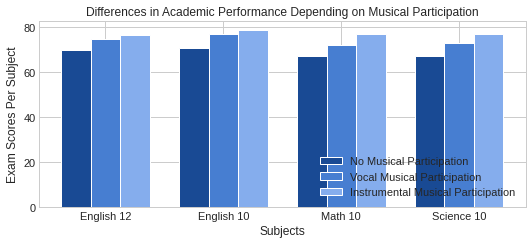

In [142]:
#CREATE NEW DATAFRAMES IN ORDER TO SET CONDITIONALS
df_no = df[df['musical_participation'] == "no"]
df_vocal = df[df['musical_participation'] == "vocal"]
df_instrumental = df[df['musical_participation'] == "instrumental"]


#this graph is meant to show how different methods of musical engagement, vs. no musical engagement compare to exam scores in each subject.
#using the new dataframes to filter the values I need in the appropriate columns
x = np.arange(len(df_no["student_exam_grades"]))
y1 = df_no["student_exam_grades"]
y2 = df_vocal["student_exam_grades"]
y3 = df_instrumental["student_exam_grades"]
width = 0.25

# plot data in grouped manner of bar type
plt.bar(x-0.25, y1, width, color='#194a94')
plt.bar(x, y2, width, color='#477ed1')
plt.bar(x+0.25, y3, width, color='#85aded')
plt.xticks(x, ['English 12', 'English 10', 'Math 10', 'Science 10'])
plt.xlabel("Subjects")
plt.ylabel("Exam Scores Per Subject")
plt.title("Differences in Academic Performance Depending on Musical Participation")
plt.legend(["No Musical Participation", "Vocal Musical Participation", "Instrumental Musical Participation"], loc="lower right")
plt.subplots_adjust(top=1.2)
plt.show()

In this graph, I was curious to see which subject was most heavily influenced by musical participation, so I created a function to help me calculate the percentage of difference between exam scores with musical participation and those without.

Interestingly enough, seems like English 12 and English 10 were almost a tie for the winner!

[4.16666667]
[4.10958904]
[4.28571429]
[4.28571429]
{'Percentages': [array([4.16666667]), array([4.10958904]), array([4.28571429]), array([4.28571429])]}


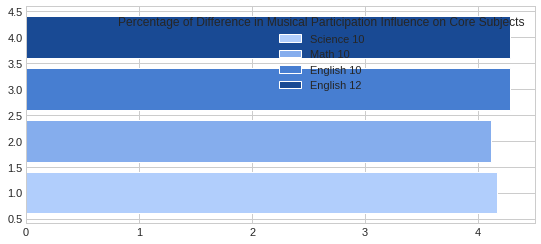

In [143]:
#function to calculate percentages between grades per subject to see how much increase there is depending on participation

english_12_none = df_musical_analysis[(df_musical_analysis['musical_participation'] == 'no') & (df_musical_analysis['school_subjects'] == 'English 12')]
english_10_none = df_musical_analysis[(df_musical_analysis['musical_participation'] == 'no') & (df_musical_analysis['school_subjects'] == 'English 10')]
math_10_none = df_musical_analysis[(df_musical_analysis['musical_participation'] == 'no') & (df_musical_analysis['school_subjects'] == 'Math 10')]
science_10_none = df_musical_analysis[(df_musical_analysis['musical_participation'] == 'no') & (df_musical_analysis['school_subjects'] == 'Science 10')]

english_12 = df_musical_analysis[(df_musical_analysis['musical_participation'] == 'yes') & (df_musical_analysis['school_subjects'] == 'English 12')]
english_10 = df_musical_analysis[(df_musical_analysis['musical_participation'] == 'yes') & (df_musical_analysis['school_subjects'] == 'English 10')]
math_10 = df_musical_analysis[(df_musical_analysis['musical_participation'] == 'yes') & (df_musical_analysis['school_subjects'] == 'Math 10')]
science_10 = df_musical_analysis[(df_musical_analysis['musical_participation'] == 'yes') & (df_musical_analysis['school_subjects'] == 'Science 10')]

value_a = (english_12['student_exam_grades'].values)
value_c = (english_10['student_exam_grades'].values)
value_e = (math_10['student_exam_grades'].values)
value_g = (science_10['student_exam_grades'].values)

value_b = (english_12_none['student_exam_grades'].values)
value_d = (english_10_none['student_exam_grades'].values)
value_f = (math_10_none['student_exam_grades'].values)
value_h = (science_10_none['student_exam_grades'].values)


my_dict = {"Percentages":[]}

def grade_difference(grade1, grade2):
  percentage = ((grade1 - grade2) / (grade1) * 100)
  print(percentage)
  my_dict["Percentages"] += [percentage]

#English 12
percentage_1 = (grade_difference(value_a, value_b))
#English 10
percentage_2 = (grade_difference(value_c, value_d))
#Math 10
percentage_2 = (grade_difference(value_e, value_f))
#Science 10
percentage_2 = (grade_difference(value_g, value_h))

print(my_dict)
#print(grade_difference((english_12_percentage_two['student_exam_grades']), (english_12_percentage_one['student_exam_grades'])))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x_1 = [4.16666667]
x_2 = [4.10958904]
x_3 = [4.28571429]
x_4 = [4.28571429]
y_1 = [1]
y_2 = [2]
y_3 = [3]
y_4 = [4]

b1 = plt.barh(y_1, x_1, color="#b1cefc")
b2 = plt.barh(y_2, x_2, color="#85aded")
b3 = plt.barh(y_3, x_3, color="#477ed1")
b4 = plt.barh(y_4, x_4, color="#194a94")

plt.legend([b1, b2, b3, b4], ["Science 10", "Math 10", "English 10", "English 12"], title="Percentage of Difference in Musical Participation Influence on Core Subjects", loc="upper right")

plt.show()

The next two graphs are quite interesting to see. I wanted to see the relationship between the engagement levels and the engagement exam numbers, and although there is an upward trend based on a higher engagement level, I did think it would be slightly more dramatic.

I think the important takeaway here is that musical participation is the most important thing, and if a student can't spend a whole lot of time participating, they can still receive lots of benefits from it.

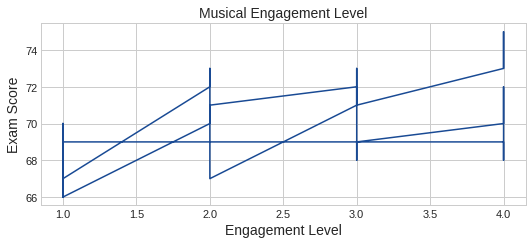

In [147]:
#Change necessary columns to int datatype
df_musical_analysis = df_musical_analysis.astype({'engagement_levels': int})
df_musical_analysis = df_musical_analysis.astype({'engagement_exam_number': int})
df_musical_analysis.dtypes

#Make sure that I grab only the applicable values and not the null values I replaced earlier
df_musical_analysis_engagement = df_musical_analysis[df_musical_analysis['engagement_levels'] > 0]
#print(df_musical_analysis_engagement)
df_musical_analysis_exams = df_musical_analysis[df_musical_analysis['engagement_exam_number'] > 0]
#print(df_musical_analysis_exams)


plt.plot(df_musical_analysis_engagement['engagement_levels'], df_musical_analysis_exams['engagement_exam_number'], color='#194a94')
plt.title('Musical Engagement Level', fontsize=14)
plt.xlabel('Engagement Level', fontsize=14)
plt.ylabel('Exam Score', fontsize=14)
plt.show()

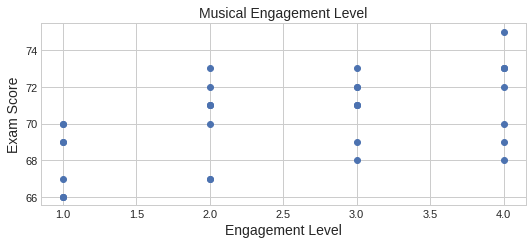

In [146]:
#price = df_musical_analysis_engagement
#sales_per_day = df_musical_analysis_exams

plt.scatter(df_musical_analysis_engagement['engagement_levels'], df_musical_analysis_exams['engagement_exam_number'])
plt.title('Musical Engagement Level', fontsize=14)
plt.xlabel('Engagement Level', fontsize=14)
plt.ylabel('Exam Score', fontsize=14)
plt.show()

Thank you so much for taking the time to view my project, and I hope I was able to prove my hypothesis of music education being extremely beneficial in the classroom!